## 여러 분류 모델 성능 평가 지표를 활용한 모델 평가

### 피마 인디언 당뇨병 예측
- 피마 인디언 당뇨병 (Pima Indian Diabetes) 데이터 세트를 이용해  
- 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고  
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 적용  

### 피마 인디언 당뇨병 예측 모델  
- 사용 데이터 세트 : Pima Indian Diabetes  
- 데이터 세트 분리 : 테스트용(평가용) 데이터 세트 20%  
- 사용하는 ML 알고리즘 : 로지스틱 회귀 알고리즘  
- 모델 평가 : 예측 성능 평가   
    - 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표 

#### 피마 인디언 당뇨명 데이터 세트  
- 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터  
- 보통 당뇨 원인으로 식습관과 유전을 꼽음  
- 피마 지역은 고립된 지역에서 인디언 고유의 활동이 지속돼 왔지만  
- 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생  
- 고립된 유전적 특성 때문에 당뇨학회에서는 피마 인디언의 당뇨병 자료에 대해 많은 연구 수행  

https://www.kaggle.com/  
회원가입하고 데이터 다운로드  


###  피마 인디언 당뇨병 예측 프로세스
(1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트  
(2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트  
(3) 모델 학습 및 예측 수행 :  로지스틱 회귀 알고리즘 적용하여 모델 학습 및 예측   
(4) 평가 : 예측 성능 평가 지표 출력   
(5) 재현율 성능에 조금 더 초점을 맞춰 조정  
(6) 예측 성능을 향상시키기 위해 데이터 가공 수행  
(7) 다시 예측 성능 평가  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### (1) 데이터 세트 준비 : 피마 인디언 당뇨명 데이터 세트

In [2]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


피마 인디언 당뇨병 데이터 세트 피처
* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [3]:
feature_data = diabetes_data.drop('Outcome', axis=1)
label_data = diabetes_data['Outcome']
feature_data.head()
label_data.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [4]:
label_data.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### (2) 데이터 세트 분리 : 학습 데이터 / 테스트 데이터 세트

In [5]:
from sklearn.model_selection import train_test_split

#### stratify=y 옵션
- 레이블 값에서 0과 1의 비율을 유지하면서 데이터 세트 분리

피마 인디언 당뇨병 데이터 세트    
- 전체 768개 중에서 1이 268개 : 34.89 %   
     
- stratify=y로 설정한 경우 (1의 비율 거의 유사)  
    - 학습 데이터 세트 에서 1의 비율 : 34.85 %  
    - 테스트 데이터 세트에서 1의 비율 : 35.06%  
         
- stratify=y로 설정하지 않은 경우 (1의 비율 차이가 있음)  
    - 학습 데이터 세트 에서 1의 비율 : 34.36 %  
    - 테스트 데이터 세트에서 1의 비율 : 37.01 %  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(feature_data,
                                                    label_data,
                                                    test_size=0.2, 
                                                    random_state=11,
                                                    stratify=label_data)
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

### (3) 모델 학습 및 예측 수행 
- 로지스틱 회귀 알고리즘 적용하여 모델 학습 및 예측 

In [7]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
y_pred_proba = lr_clf.predict_proba(X_test)[:, 1] # Positive 확률값만 사용

### (4) 평가 : 예측 성능 평가 지표 출력 
- 오차행렬, 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 평가 지표

In [8]:
from sklearn.metrics import confusion_matrix,precision_score, \
recall_score, accuracy_score, f1_score, roc_curve, auc, roc_auc_score

def get_clf_eval(y_test, y_pred, y_pred_proba):
    print("< Confusion Matrix >")
    print(confusion_matrix(y_test, y_pred))
    
    print("Accuracy : ", end="")
    print(f"{accuracy_score(y_test, y_pred):.4f}", end=", ")
    
    print("Precision : ", end="")
    print(f"{precision_score(y_test, y_pred):.4f}", end=", ")
    
    print("Recall : ", end="")
    print(f"{recall_score(y_test, y_pred):.4f}", end=", ")
    
    print("F1 Score : ", end="")
    print(f"{f1_score(y_test, y_pred):.4f}", end=", ")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    print("AUC of ROC : ", end="")
    print(f"{auc(fpr, tpr):.4f}")
    
#     print("AUC of ROC(short) : ")
#     print(f"{roc_auc_score(y_test, y_pred_proba):.4f}")

In [9]:
get_clf_eval(y_test, y_pred, y_pred_proba)

< Confusion Matrix >
[[90 10]
 [24 30]]
Accuracy : 0.7792, Precision : 0.7500, Recall : 0.5556, F1 Score : 0.6383, AUC of ROC : 0.8513


### (5) 재현율 성능에 조금 더 초점을 맞춰 조정

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

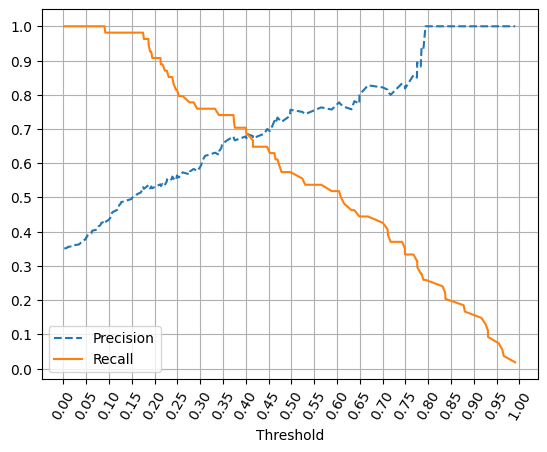

In [11]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
lim = thresholds.size
lim

plt.plot(thresholds, precision[:lim], linestyle='--', label='Precision')
plt.plot(thresholds, recalls[:lim], label='Recall')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel('Threshold')
plt.xticks(np.linspace(0, 1, 21), rotation=60)
plt.grid(True)
plt.legend(ncol=1)
plt.show()


### (6) 예측 성능을 향상시키기 위해 데이터 가공 수행
- 0 값 확인하고 다른 값으로 대체
- 피처 스케일링 

In [12]:
diabetes_data.describe()

# min 값이 0인 피처가 어느 정도 존재하는 것을 확인
# Glucose(포도당), BloodPressure(혈압),SkinThickness(팔 뒤쪽 피하지방), Insulin,  BMI(체질량지수)
# 이런 피처들이 0이 날올 수 없는데 0으로 되어 있음
# ----> 전처리(가공) 작업 필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 각 피처들의 값 분포 확인

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

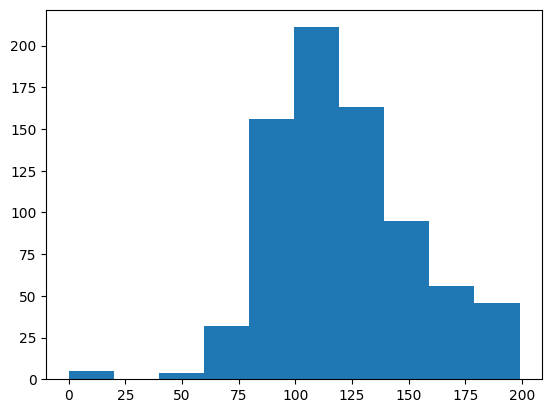

In [13]:
# Glucose(포도당) 피처의 히스토그램 확인
plt.hist(diabetes_data['Glucose'], bins=10)
# 0값이 일정 수준 존재 확인

### 0값이 있는 피처들에서 0값의 데이터 건수와 퍼센트 계산
- 0값의 데이터 건수  
- 전체 데이터 건수 대비 몇 퍼센트의 비율인지 확인  

In [14]:
# 0값을 검사할 피처명 리스트 생성
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터건수
total_count = diabetes_data['Glucose'].count()
total_count

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


# 0 값이 상당히 많음
# 전체 데이터 건수가 많지 않기 때문에
# 0값인 데이터를 삭제할 경우에
# 학습을 효과적으로 수행하기 어려울 것 같으므로
# 0값을 평균값으로 대체

Glucose 0건수는 5, 퍼센트 0.65 %
BloodPressure 0건수는 35, 퍼센트 4.56 %
SkinThickness 0건수는 227, 퍼센트 29.56 %
Insulin 0건수는 374, 퍼센트 48.70 %
BMI 0건수는 11, 퍼센트 1.43 %


**0값을 평균값으로 대체**

In [15]:
for feature in zero_features:
    mean = diabetes_data[feature].mean()
    print(mean)
    diabetes_data[feature] = diabetes_data[feature].apply(lambda x: x if x>0 else mean)

# 확인
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0건수는 {1}, 퍼센트 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999998
Glucose 0건수는 0, 퍼센트 0.00 %
BloodPressure 0건수는 0, 퍼센트 0.00 %
SkinThickness 0건수는 0, 퍼센트 0.00 %
Insulin 0건수는 0, 퍼센트 0.00 %
BMI 0건수는 0, 퍼센트 0.00 %


(array([  4.,  19.,  87., 149., 166., 125.,  88.,  54.,  44.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

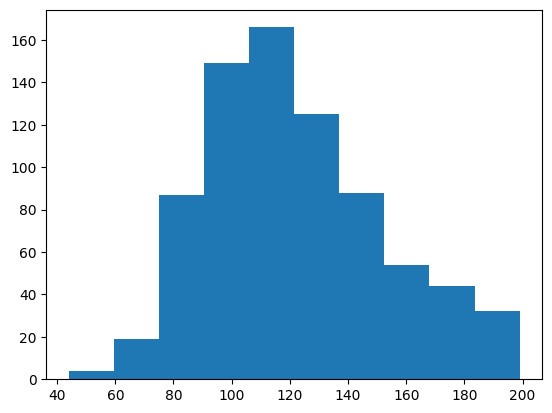

In [16]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [17]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 피처 스케일링 (feature scaling)
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤
- StandardScaler 클래스의 fit_transform() 메소드 이용해서 
- 피처 데이터 세트에 일괄적으로 스케일링 적용하고  
- 0값을 평균으로 대체한 데이터 세트로 학습/예측 수행  
- 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

### 피처 스케일링 후 다시 예측 프로세스 진행

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

feature_data_scaled = std_scaler.fit_transform(feature_data)

X_train, X_test, y_train, y_test = train_test_split(feature_data_scaled,
                                                    label_data,
                                                    test_size=0.2, 
                                                    random_state=11,
                                                    stratify=label_data)

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
y_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, y_pred_proba)

< Confusion Matrix >
[[90 10]
 [24 30]]
Accuracy : 0.7792, Precision : 0.7500, Recall : 0.5556, F1 Score : 0.6383, AUC of ROC : 0.8511


### 임계값을 변화시키면서 재현율 성능 측정
- 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서
- 재현율과 다른 평가 지표의 값 확인

In [21]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, y_pred_proba, thresholds):
    for custom_threshold in thresholds:
        # binarizer = Binarizer(threshold=custom_threshold).fit(y_pred_proba)
        # custom_predict = binarizer.transform(y_pred_proba)
        custom_predict = Binarizer(threshold=custom_threshold).fit_transform(y_pred_proba)
        print('\n ** Threshold : ', custom_threshold, ' **')
        get_clf_eval(y_test, custom_predict, y_pred_proba)

In [23]:
thresholds = np.linspace(0.3, 0.5, 11)
get_eval_by_threshold(y_test, y_pred_proba.reshape(-1, 1), thresholds)


 ** Threshold :  0.3  **
< Confusion Matrix >
[[74 26]
 [13 41]]
Accuracy : 0.7468, Precision : 0.6119, Recall : 0.7593, F1 Score : 0.6777, AUC of ROC : 0.8511

 ** Threshold :  0.32  **
< Confusion Matrix >
[[76 24]
 [13 41]]
Accuracy : 0.7597, Precision : 0.6308, Recall : 0.7593, F1 Score : 0.6891, AUC of ROC : 0.8511

 ** Threshold :  0.33999999999999997  **
< Confusion Matrix >
[[77 23]
 [14 40]]
Accuracy : 0.7597, Precision : 0.6349, Recall : 0.7407, F1 Score : 0.6838, AUC of ROC : 0.8511

 ** Threshold :  0.36  **
< Confusion Matrix >
[[80 20]
 [14 40]]
Accuracy : 0.7792, Precision : 0.6667, Recall : 0.7407, F1 Score : 0.7018, AUC of ROC : 0.8511

 ** Threshold :  0.38  **
< Confusion Matrix >
[[82 18]
 [16 38]]
Accuracy : 0.7792, Precision : 0.6786, Recall : 0.7037, F1 Score : 0.6909, AUC of ROC : 0.8511

 ** Threshold :  0.4  **
< Confusion Matrix >
[[82 18]
 [16 38]]
Accuracy : 0.7792, Precision : 0.6786, Recall : 0.7037, F1 Score : 0.6909, AUC of ROC : 0.8511

 ** Threshold 